# Introduction

Time series is a sequence or series of data points in which the time component is involved throughout the occurrence and Analyzing this time series data with certain tools and techniques is called time series analysis.

[Click Here](https://www.analyticsvidhya.com/blog/2021/06/time-series-analysis-a-comprehensive-guide/) to know more about Time series analysis.

Here, I am going to visualize and predict price of different kind of cryptocurrencies which are following:
- Bitcoin
- Cardano
- Dogecoin
- Ethereum


## Brief introduction of XGBoost

**XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.**

[Click here](https://medium.com/analytics-vidhya/introduction-to-xgboost-algorithm-d2e7fad76b04) to know more about XGBoost.

## Import Libraries

In [102]:
!pip install colorama
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore # This line was causing the error

## Import Dataset

## Bitcoin

**Bitcoin is a digital currency which operates free of any central control or the oversight of banks or governments. Instead it relies on peer-to-peer software and cryptography. A public ledger records all bitcoin transactions and copies are held on servers around the world.**

In [103]:
bitcoindf = pd.read_csv('/content/BTC-USD.csv')
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


## Dogecoin

**Dogecoin is primarily used for tipping users on Reddit and Twitter, but it is also accepted as a method of payment by a few dozen merchants. It can be used to buy food, household supplies and even website domains.**

In [104]:
dogecoindf = pd.read_csv('/content/DOGE-USD.csv')
dogecoindf = dogecoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
dogecoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,0.000127,0.000129,0.000123,0.000126,0.000126,40889.0
1,2015-09-14,0.000125,0.000126,0.000122,0.000125,0.000125,61189.0
2,2015-09-15,0.000125,0.000131,0.000123,0.000126,0.000126,43332.0
3,2015-09-16,0.000126,0.000126,0.000122,0.000124,0.000124,60323.0
4,2015-09-17,0.000124,0.000126,0.000122,0.000125,0.000125,60512.0


## Ethereum

**Ethereum operates on a decentralized computer network, or distributed ledger called a blockchain, which manages and tracks the currency. It can be useful to think of a blockchain like a running receipt of every transaction that's ever taken place in the cryptocurrency.**

In [105]:
ethereumdf = pd.read_csv('/content/ETH-USD.csv')
ethereumdf = ethereumdf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethereumdf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


## Cardano

**The cardano blockchain can be used to build smart contracts, and in turn, create decentralized applications and protocols. Additionally, the ability to send and receive funds instantly through, for minimal fees, have many applications in the world of business and finance.**

In [106]:
cardanodf = pd.read_csv('/content/ADA-USD.csv')
cardanodf = cardanodf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
cardanodf.head()

,date,open,high,low,close,adj_close,volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


# Preprocessing

#### Replace None or Null values with forward filling technique using *fillna* function.

In [107]:
bitcoindf = bitcoindf.fillna(method = 'ffill')
dogecoindf = dogecoindf.fillna(method = 'ffill')
ethereumdf = ethereumdf.fillna(method = 'ffill')
cardanodf = cardanodf.fillna(method = 'ffill')

#### Convert Date column into Datatime format

In [108]:
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
bitcoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'skyblue'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.000000
1,2015-09-14 00:00:00,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.000000
2,2015-09-15 00:00:00,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.000000
3,2015-09-16 00:00:00,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.000000
4,2015-09-17 00:00:00,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.000000


In [109]:
dogecoindf['date'] = pd.to_datetime(dogecoindf.date)
dogecoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'pink'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,0.000127,0.000129,0.000123,0.000126,0.000126,40889.000000
1,2015-09-14 00:00:00,0.000125,0.000126,0.000122,0.000125,0.000125,61189.000000
2,2015-09-15 00:00:00,0.000125,0.000131,0.000123,0.000126,0.000126,43332.000000
3,2015-09-16 00:00:00,0.000126,0.000126,0.000122,0.000124,0.000124,60323.000000
4,2015-09-17 00:00:00,0.000124,0.000126,0.000122,0.000125,0.000125,60512.000000


In [110]:
ethereumdf['date'] = pd.to_datetime(ethereumdf.date)
ethereumdf.head().style.set_properties(subset=['date','close'], **{'background-color': 'lightgrey'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,1.041780,1.042700,0.902832,0.936003,0.936003,644138.000000
1,2015-09-14 00:00:00,0.940566,0.949387,0.871760,0.875622,0.875622,741085.000000
2,2015-09-15 00:00:00,0.875189,1.045540,0.875189,0.944410,0.944410,703390.000000
3,2015-09-16 00:00:00,0.941977,0.952698,0.901639,0.907175,0.907175,615593.000000
4,2015-09-17 00:00:00,0.906865,0.909204,0.831132,0.874231,0.874231,897940.000000


In [111]:
cardanodf['date'] = pd.to_datetime(cardanodf.date)
cardanodf.head().style.set_properties(subset=['date','close'], **{'background-color': 'yellow'})

,date,open,high,low,close,adj_close,volume
0,2017-10-01 00:00:00,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.000000
1,2017-10-02 00:00:00,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.000000
2,2017-10-03 00:00:00,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.000000
3,2017-10-04 00:00:00,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.000000
4,2017-10-05 00:00:00,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.000000


# Visualization

### Plotting close price of Bitcoin, Cardano, Dogecoin and Ethereum

Text(0.5, 1.0, 'Ethereum Close Price')

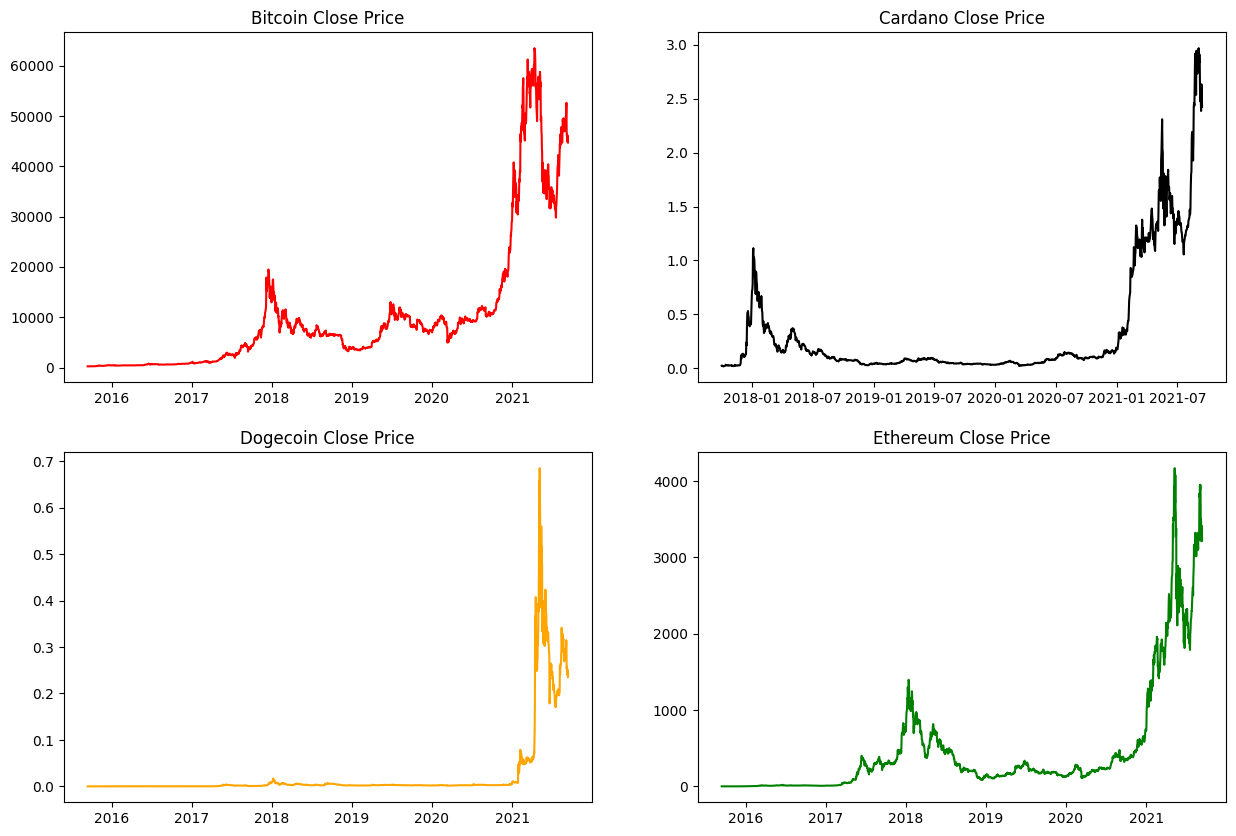

In [112]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'], color="black")
plt.title('Cardano Close Price')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'], color="orange")
plt.title('Dogecoin Close Price')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'], color="green")
plt.title('Ethereum Close Price')

#### Plotting only 2020-2021 year close price of Bitcoin, Cardano, Dogecoin and Ethereum

In [113]:
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '09-2020']
last1year_cardanodf = cardanodf[cardanodf['date'] > '09-2020']
last1year_dogecoindf = dogecoindf[dogecoindf['date'] > '09-2020']
last1year_ethereumdf = ethereumdf[ethereumdf['date'] > '09-2020']

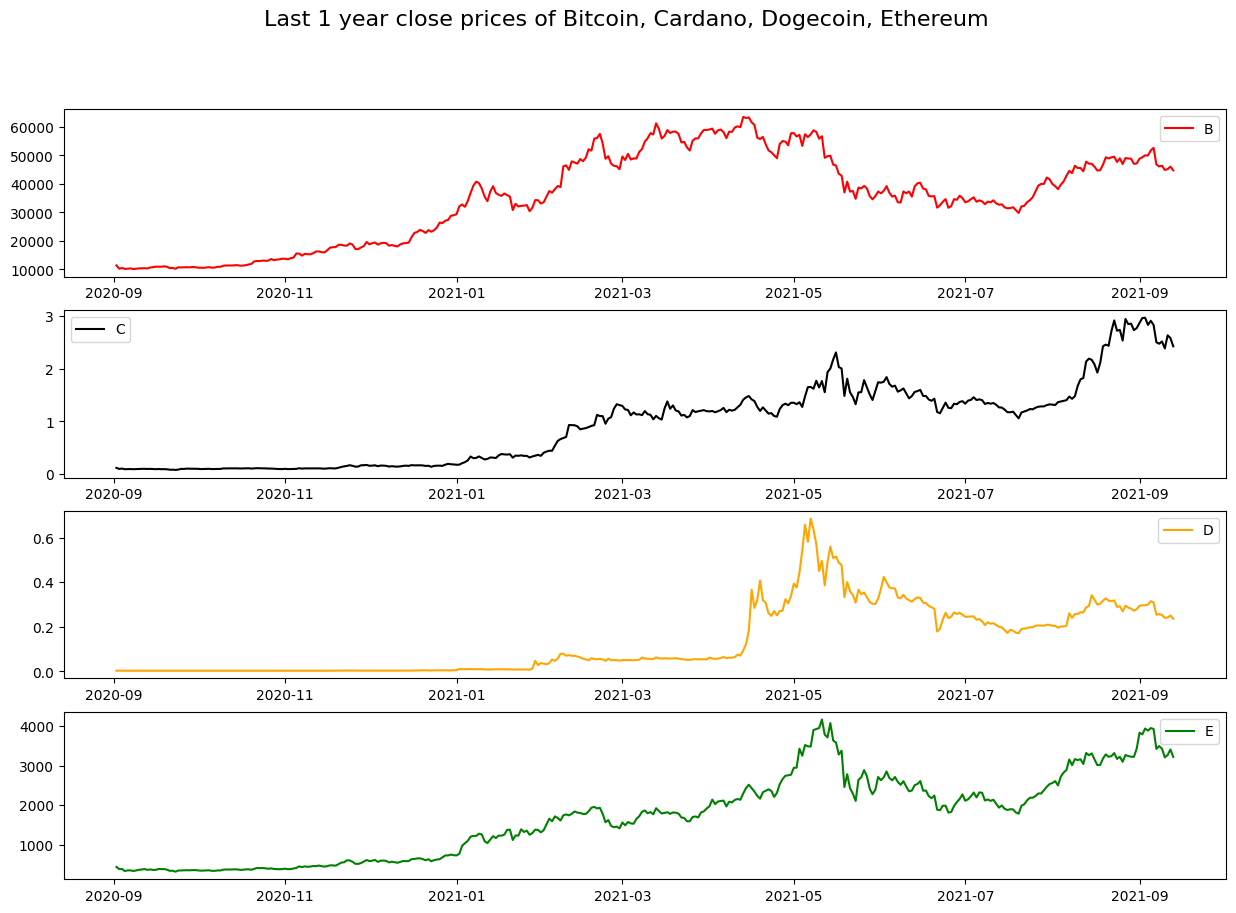

In [114]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last 1 year close prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color="red")
plt.legend("B")

plt.subplot(4, 1, 2)
plt.plot(last1year_cardanodf['date'], last1year_cardanodf['close'], color="black")
plt.legend("C")

plt.subplot(4, 1, 3)
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['close'], color="orange")
plt.legend("D")

plt.subplot(4, 1, 4)
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['close'], color="green")
plt.legend("E")


#### Plotting only 2020-2021 year volume of Bitcoin, Cardano, Dogecoin and Ethereum

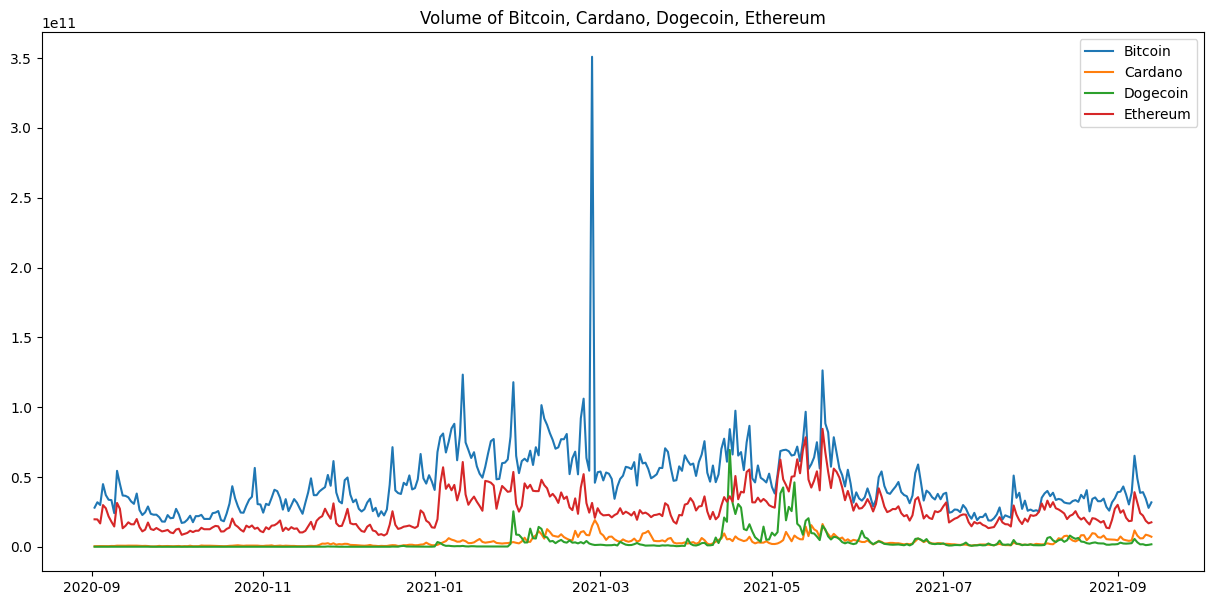

In [115]:
fig = plt.figure(figsize = (15,7))

plt.plot(last1year_bitcoindf['date'] , last1year_bitcoindf['volume'])
plt.plot(last1year_cardanodf['date'] , last1year_cardanodf['volume'])
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['volume'])
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['volume'])
plt.title('Volume of Bitcoin, Cardano, Dogecoin, Ethereum')
plt.legend(['Bitcoin', 'Cardano', 'Dogecoin', 'Ethereum'])


plt.show()

#### Plotting last month open and close price of Bitcoin, Cardano, Dogecoin and Ethereum with comparision

In [116]:
last1month_bitcoindf = bitcoindf[bitcoindf['date'] > '08-2021']
last1month_cardanodf = cardanodf[cardanodf['date'] > '08-2021']
last1month_dogecoindf = dogecoindf[dogecoindf['date'] > '08-2021']
last1month_ethereumdf = ethereumdf[ethereumdf['date'] > '08-2021']

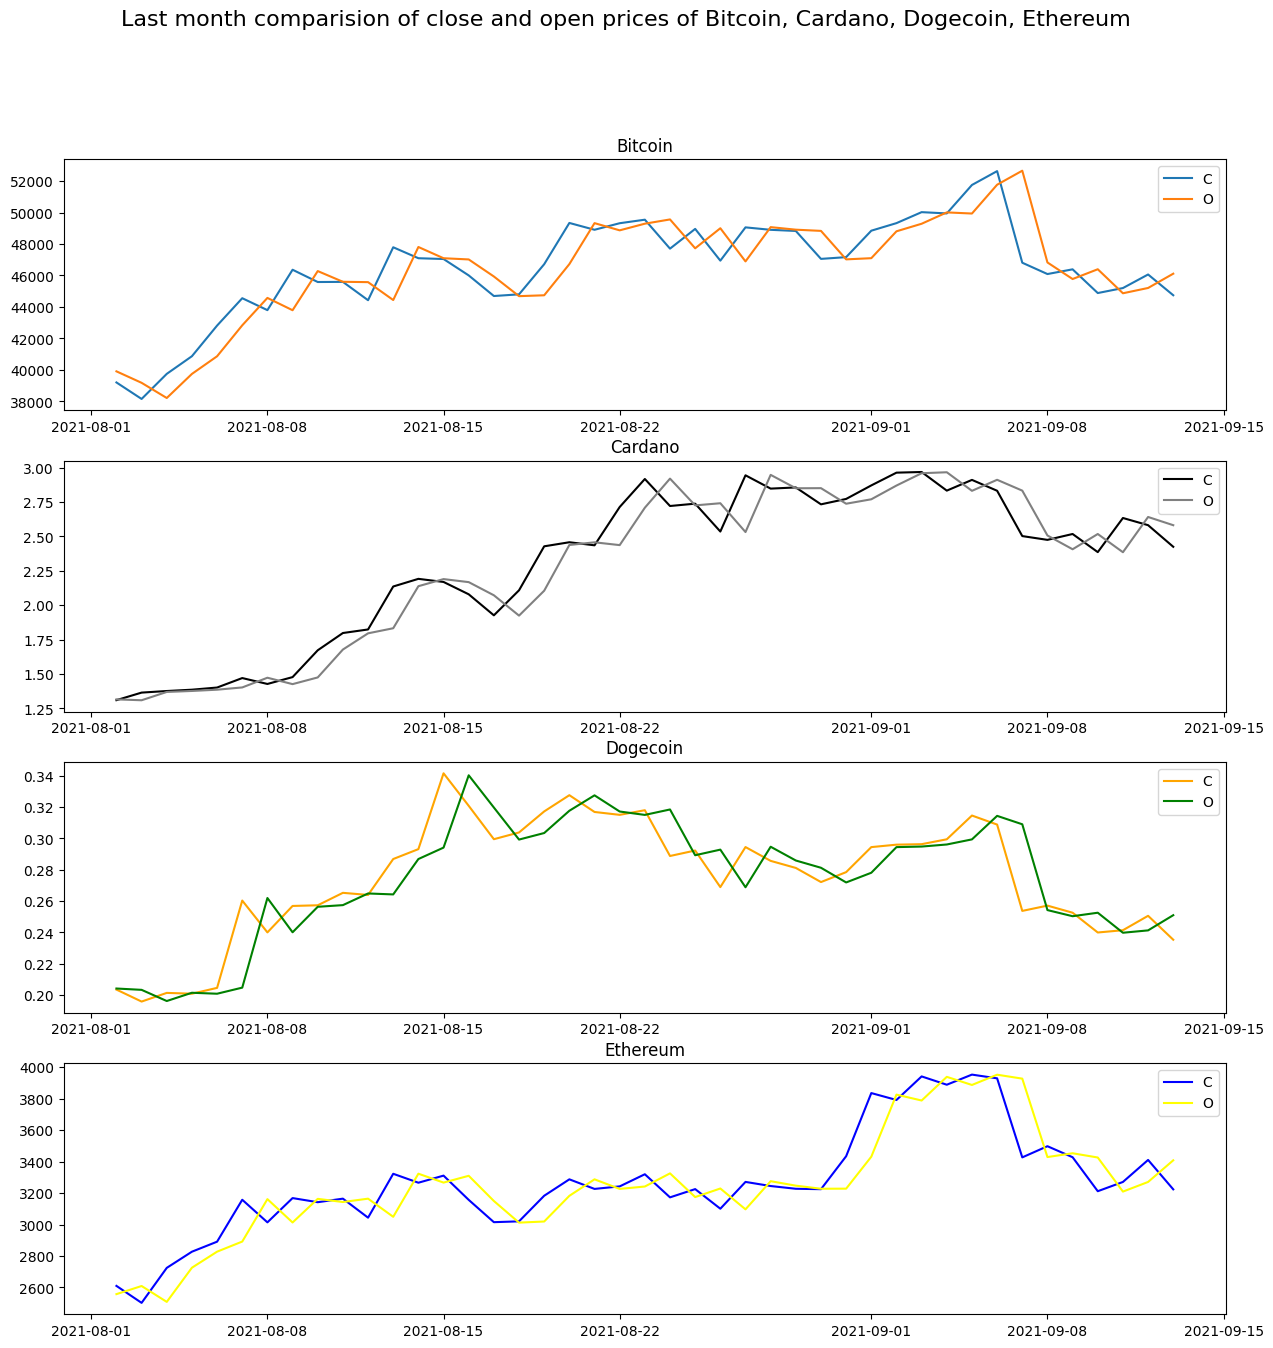

In [117]:
fig = plt.figure(figsize = (15,15))
fig.suptitle("Last month comparision of close and open prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)
fig.tight_layout()

plt.subplot(4, 1, 1)
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['close'])
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['open'])
plt.legend(["C", "O"])
plt.title("Bitcoin")

plt.subplot(4, 1, 2)
plt.plot(last1month_cardanodf['date'], last1month_cardanodf['close'], color="black")
plt.plot(last1month_cardanodf['date'], last1month_cardanodf['open'], color="grey")
plt.legend(["C", "O"])
plt.title("Cardano")

plt.subplot(4, 1, 3)
plt.plot(last1month_dogecoindf['date'], last1month_dogecoindf['close'], color="orange")
plt.plot(last1month_dogecoindf['date'], last1month_dogecoindf['open'], color="green")
plt.legend(["C", "O"])
plt.title("Dogecoin")

plt.subplot(4, 1, 4)
plt.plot(last1month_ethereumdf['date'], last1month_ethereumdf['close'], color="blue")
plt.plot(last1month_ethereumdf['date'], last1month_ethereumdf['open'], color="yellow")
plt.legend(["C", "O"])
plt.title("Ethereum")


plt.show()

### Moving Averages
**As we know the stock prices are highly volatile and prices change quickly with time. To observe any trend or pattern we can take the help of a 50-day 200-day average.**

Text(0.5, 1.0, 'Ethereum Close Price moving average')

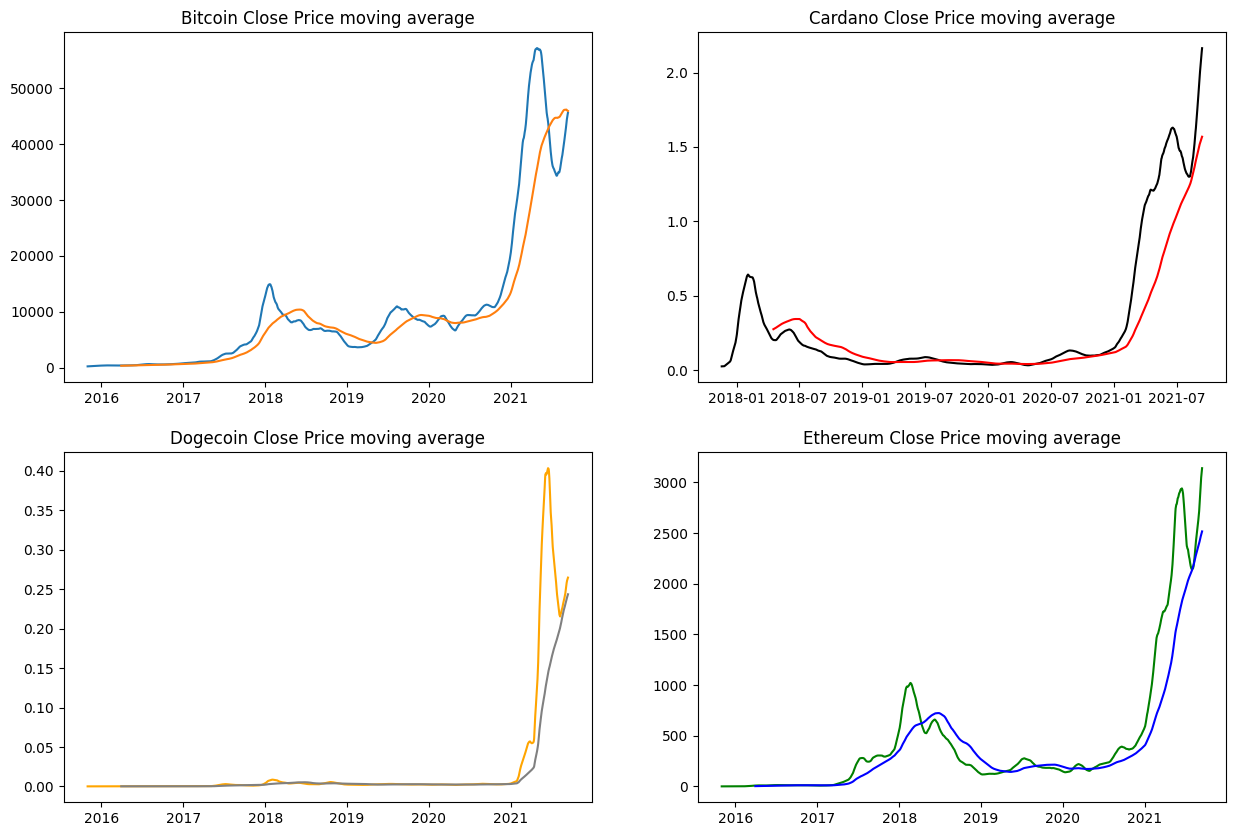

In [118]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(50).mean())
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(200).mean())
plt.title('Bitcoin Close Price moving average')

plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'].rolling(50).mean(), color="black")
plt.plot(cardanodf['date'], cardanodf['close'].rolling(200).mean(), color="red")
plt.title('Cardano Close Price moving average')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'].rolling(50).mean(), color="orange")
plt.plot(dogecoindf['date'], dogecoindf['close'].rolling(200).mean(), color="grey")
plt.title('Dogecoin Close Price moving average')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'].rolling(50).mean(), color="green")
plt.plot(ethereumdf['date'], ethereumdf['close'].rolling(200).mean(), color="blue")
plt.title('Ethereum Close Price moving average')

### Plotting histogram with mean indicator of all four cryptocurrencies

Text(3100, 400, 'Ethereum Close Price')

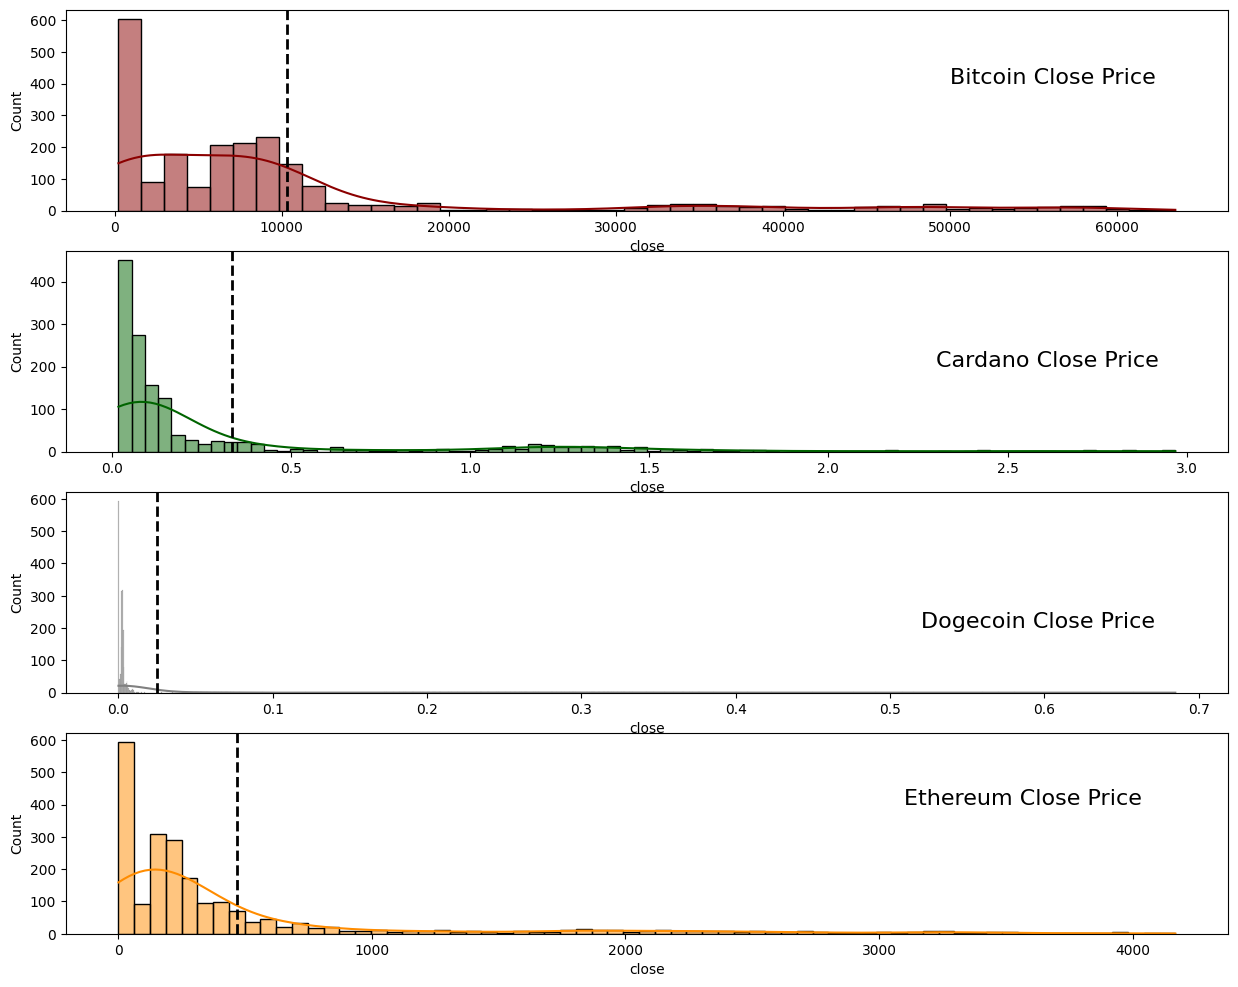

In [119]:
fig = plt.figure(figsize = (15,12))

fig.tight_layout()

plt.subplot(4, 1, 1)
sns.histplot(bitcoindf['close'],color='darkred', kde=True)
plt.axvline(bitcoindf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(50000,400,'Bitcoin Close Price', fontsize=16)

plt.subplot(4, 1, 2)
sns.histplot(cardanodf['close'],color='darkgreen', kde=True)
plt.axvline(cardanodf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(2.3,200,'Cardano Close Price', fontsize=16)

plt.subplot(4, 1, 3)
sns.histplot(dogecoindf['close'],color='grey', kde=True)
plt.axvline(dogecoindf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(0.52,200,'Dogecoin Close Price', fontsize=16)

plt.subplot(4, 1, 4)
sns.histplot(ethereumdf['close'],color='darkorange', kde=True)
plt.axvline(ethereumdf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(3100,400,'Ethereum Close Price', fontsize=16)


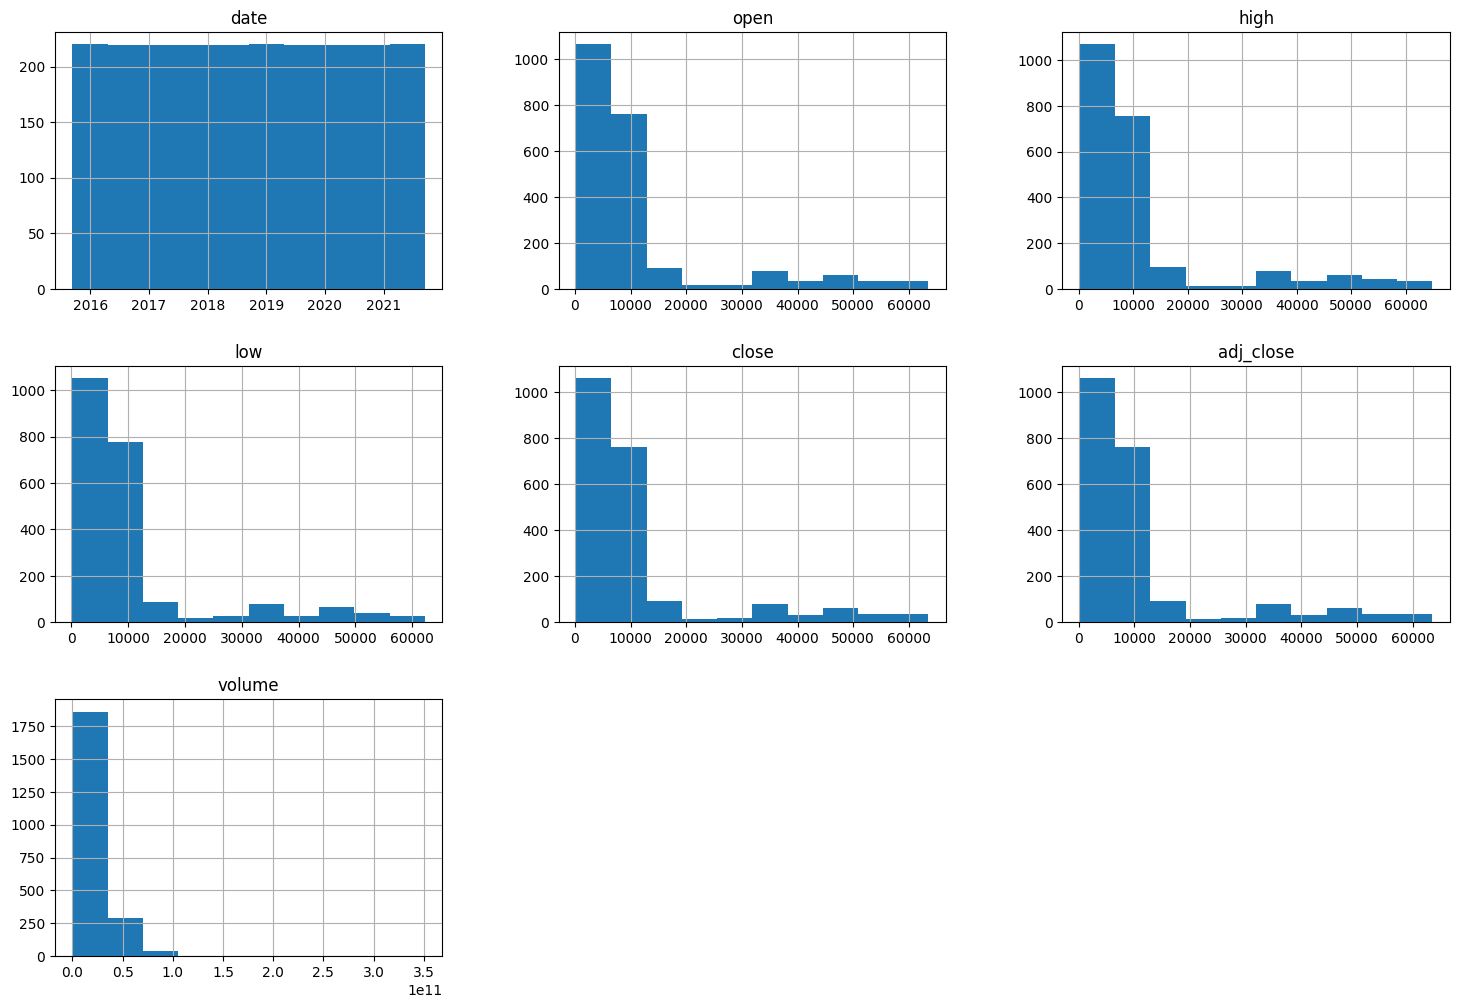

In [120]:
bitcoin_numeric = bitcoindf.select_dtypes(exclude = ["bool"])
bitcoin_numeric.hist(figsize=(18,12))
plt.show()

#  Bitcoin Close Price Prediction using XGBoost

#### Dataframe of bitcoin close price

In [121]:
closedf = bitcoindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2193, 2)


In [122]:
closedf = closedf[closedf['date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  365


#### Normalizing close price value

In [123]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(365, 1)


#### Separate data for Train and Test

In [124]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


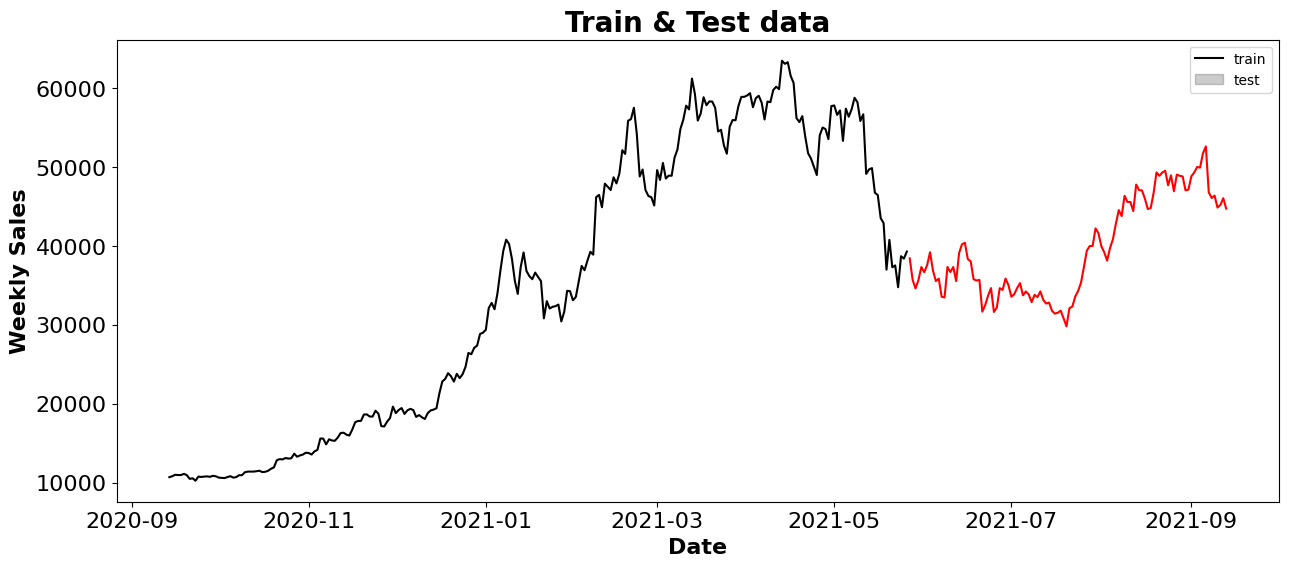

In [125]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:255], y = close_stock['close'][:255], color = 'black')
sns.lineplot(x = close_stock['date'][255:], y = close_stock['close'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

#### Prepare train data for time series analysis

In [126]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [127]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (239, 15)
y_train:  (239,)
X_test:  (94, 15)
y_test (94,)


#### Import XGBRegressor module and Fit X_train and y_train for training model

In [128]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Model testing and evaluation

In [129]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.03075410308003782
Root Mean squared Error - RMSE : 0.03971437751524892


In [130]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (239, 1)
Test data prediction: (94, 1)


In [131]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [132]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


#### Prediction next 10 days

In [133]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = my_model.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [134]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [135]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [136]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Note: For trying other cryptocurrencies, you just need to change closedf

### If you want to try with Stock prediction with other algorithms such as SVR, KNN, RFR, LSTM, GRU then refered following notebook.

- https://www.kaggle.com/ysthehurricane/advanced-stock-pred-using-svr-rfr-knn-lstm-gru
- https://www.kaggle.com/ysthehurricane/tesla-stock-price-prediction-using-gru-tutorial

In [138]:
!pip install prophet

# Additional imports for time series models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import xgboost as xgb
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')


In [139]:
def implement_arima_model(df, train_size=0.8):
    """Implement and evaluate ARIMA model for cryptocurrency price prediction"""
    # Create copy of dataframe to avoid modifying original
    data = df.copy()
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')

    # Split data into train and test sets
    train_data = data[:int(len(data)*train_size)]
    test_data = data[int(len(data)*train_size):]

    # Find optimal ARIMA parameters
    print("Finding optimal ARIMA parameters...")
    best_aic = float('inf')
    best_order = None
    best_model = None

    # Grid search for p, d, q parameters
    p_values = range(0, 3)
    d_values = range(0, 2)
    q_values = range(0, 3)

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(train_data['close'], order=(p, d, q))
                    model_fit = model.fit()

                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                        best_model = model_fit
                except Exception as e:
                    continue

    print(f"Best ARIMA order: {best_order} with AIC: {best_aic:.2f}")

    # Make predictions on test set
    predictions = best_model.forecast(steps=len(test_data))

    # Calculate performance metrics
    mse = mean_squared_error(test_data['close'], predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_data['close'], predictions)
    r2 = r2_score(test_data['close'], predictions)

    print(f"ARIMA Model Evaluation:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(14, 7))
    plt.plot(test_data.index, test_data['close'], label='Actual')
    plt.plot(test_data.index, predictions, label='ARIMA Predictions', color='red')
    plt.title(f'ARIMA Model ({best_order}) Predictions vs Actual', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return best_model, best_order, predictions, test_data['close']


In [140]:
def implement_prophet_model(df, train_size=0.8):
    """Implement Facebook Prophet model for cryptocurrency price prediction"""
    # Create copy and prepare data for Prophet
    data = df.copy()
    prophet_data = data[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})
    prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])

    # Split data
    train_data = prophet_data.iloc[:int(len(prophet_data)*train_size)]
    test_data = prophet_data.iloc[int(len(prophet_data)*train_size):]

    # Fit Prophet model
    print("Fitting Prophet model...")
    model = Prophet(changepoint_prior_scale=0.05, # Flexibility of trend
                   yearly_seasonality=True,
                   weekly_seasonality=True,
                   daily_seasonality=False)
    model.fit(train_data)

    # Create future dataframe for predictions
    future = model.make_future_dataframe(periods=len(test_data))
    forecast = model.predict(future)

    # Extract predictions for test period
    predictions = forecast.iloc[-len(test_data):]['yhat'].values

    # Calculate metrics
    mse = mean_squared_error(test_data['y'].values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_data['y'].values, predictions)
    r2 = r2_score(test_data['y'].values, predictions)

    print(f"Prophet Model Evaluation:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

    # Plot results
    fig1 = model.plot(forecast)
    plt.title('Prophet Model - Full Forecast', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Plot components
    fig2 = model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

    return model, forecast, predictions, test_data['y'].values


In [141]:
def implement_hybrid_arima_xgboost(df, train_size=0.8):
    """Implement a hybrid ARIMA-XGBoost model for cryptocurrency price prediction"""
    # Create copy of dataframe
    data = df.copy()
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')

    # Split data
    train_data = data[:int(len(data)*train_size)]
    test_data = data[int(len(data)*train_size):]

    # Step 1: Fit ARIMA model to capture linear components
    print("Fitting ARIMA component of hybrid model...")
    arima_model = ARIMA(train_data['close'], order=(1, 1, 1))
    arima_fit = arima_model.fit()

    # Get ARIMA predictions for both train and test sets
    arima_train_pred = arima_fit.predict(start=0, end=len(train_data)-1)
    arima_test_pred = arima_fit.forecast(steps=len(test_data))

    # Step 2: Calculate residuals for XGBoost to model
    train_residuals = train_data['close'] - arima_train_pred

    # Step 3: Create features for XGBoost from residuals
    def create_features(data, lag=5):
        df = pd.DataFrame(data)
        df.columns = ['residual']

        # Create lag features
        for i in range(1, lag+1):
            df[f'lag_{i}'] = df['residual'].shift(i)

        # Add some calendar features
        if isinstance(df.index, pd.DatetimeIndex):
            df['dayofweek'] = df.index.dayofweek
            df['month'] = df.index.month
            df['quarter'] = df.index.quarter

        return df.dropna()

    # Create train features
    X_train = create_features(train_residuals)
    X_train_features = X_train.drop('residual', axis=1)
    y_train = X_train['residual']

    # Step 4: Train XGBoost on residuals
    print("Training XGBoost component on ARIMA residuals...")
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    xgb_model.fit(X_train_features, y_train)

    # Step 5: Prepare test features
    # We need the last 5 residuals from training to create initial features
    last_train_residuals = train_residuals.iloc[-5:].values
    test_predictions = []

    # Make predictions one step at a time
    current_residuals = list(last_train_residuals)

    for i in range(len(test_data)):
        # Create features for this time step
        features = current_residuals[-5:]  # Get last 5 residuals
        features.reverse()  # Reverse to get in right order for lag features

        # Create calendar features
        date_features = [
            test_data.index[i].dayofweek,
            test_data.index[i].month,
            test_data.index[i].quarter
        ]

        # Combine all features
        all_features = np.array([*features, *date_features]).reshape(1, -1)

        # Predict residual
        residual_pred = xgb_model.predict(all_features)[0]

        # Add predicted residual to ARIMA prediction
        combined_pred = arima_test_pred[i] + residual_pred
        test_predictions.append(combined_pred)

        # Update current_residuals for next prediction
        # In a real-time scenario, you would use actual residual once available
        # For this example, we'll use the predicted residual
        current_residuals.append(residual_pred)
        current_residuals.pop(0)  # Remove oldest value

    # Calculate metrics
    mse = mean_squared_error(test_data['close'], test_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_data['close'], test_predictions)
    r2 = r2_score(test_data['close'], test_predictions)

    print(f"Hybrid ARIMA-XGBoost Model Evaluation:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

    # Plot results
    plt.figure(figsize=(14, 7))
    plt.plot(test_data.index, test_data['close'], label='Actual')
    plt.plot(test_data.index, arima_test_pred, label='ARIMA Component', color='green', alpha=0.5)
    plt.plot(test_data.index, test_predictions, label='Hybrid ARIMA-XGBoost', color='red')
    plt.title('Hybrid ARIMA-XGBoost Model Predictions', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return (arima_fit, xgb_model), test_predictions, test_data['close']


In [142]:
def implement_xgboost_model(df, train_size=0.8):
    """Implement XGBoost model for cryptocurrency price prediction"""
    # Create copy of dataframe
    data = df.copy()
    data['date'] = pd.to_datetime(data['date'])

    # Feature engineering
    # Date-based features
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofyear'] = data['date'].dt.dayofyear
    data['dayofmonth'] = data['date'].dt.day

    # Lag features
    for lag in range(1, 6):
        data[f'lag_{lag}'] = data['close'].shift(lag)

    # Rolling statistics
    data['rolling_mean_7'] = data['close'].rolling(window=7).mean()
    data['rolling_std_7'] = data['close'].rolling(window=7).std()
    data['rolling_mean_30'] = data['close'].rolling(window=30).mean()
    data['rolling_std_30'] = data['close'].rolling(window=30).std()

    # Price momentum
    data['price_momentum'] = data['close'] / data['close'].shift(1)

    # Drop NaN values
    data = data.dropna()

    # Prepare features and target
    features = [col for col in data.columns if col not in ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']]
    X = data[features]
    y = data['close']

    # Scale features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    train_size_idx = int(len(data) * train_size)
    X_train, X_test = X_scaled[:train_size_idx], X_scaled[train_size_idx:]
    y_train, y_test = y[:train_size_idx], y[train_size_idx:]

    # Train XGBoost model
    print("Training XGBoost model...")
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"XGBoost Model Evaluation:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    xgb.plot_importance(model, max_num_features=15)
    plt.title('XGBoost Feature Importance', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Plot predictions
    plt.figure(figsize=(14, 7))
    plt.plot(data['date'].iloc[train_size_idx:].reset_index(drop=True), y_test.reset_index(drop=True), label='Actual')
    plt.plot(data['date'].iloc[train_size_idx:].reset_index(drop=True), predictions, label='XGBoost Predictions', color='red')
    plt.title('XGBoost Model Predictions vs Actual', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return model, predictions, y_test


In [143]:
# def compare_models(models_results):
#     """Compare performance of all models"""
#     models_df = pd.DataFrame({
#         'Model': [],
#         'MSE': [],
#         'RMSE': [],
#         'MAE': [],
#         'R²': []
#     })

#     # Plot all predictions on the same chart
#     plt.figure(figsize=(16, 8))

#     # Get common test data timeframe
#     test_dates = None
#     test_actual = None

#     for model_name, (_, predictions, actuals) in models_results.items():
#         # Calculate metrics
#         mse = mean_squared_error(actuals, predictions)
#         rmse = np.sqrt(mse)
#         mae = mean_absolute_error(actuals, predictions)
#         r2 = r2_score(actuals, predictions)

#         # Add to DataFrame
#         models_df = models_df.append({
#             'Model': model_name,
#             'MSE': mse,
#             'RMSE': rmse,
#             'MAE': mae,
#             'R²': r2
#         }, ignore_index=True)

#         # Save test data for plotting
#         if test_dates is None:
#             test_dates = pd.date_range(end=bitcoindf['date'].iloc[-1], periods=len(actuals))
#             test_actual = actuals

#         # Plot predictions
#         plt.plot(test_dates, predictions, label=f'{model_name} Predictions')

#     # Plot actual values
#     plt.plot(test_dates, test_actual, 'k-', label='Actual Values', linewidth=2)

#     plt.title('Comparison of All Models', fontsize=16)
#     plt.xlabel('Date', fontsize=12)
#     plt.ylabel('Price', fontsize=12)
#     plt.legend()
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.show()

#     # Sort models by RMSE (lower is better)
#     models_df = models_df.sort_values('RMSE')

#     # Display comparison table
#     print("Model Performance Comparison:")
#     print(models_df)

#     # Create bar chart comparison
#     plt.figure(figsize=(12, 6))

#     # Plot RMSE comparison
#     plt.subplot(1, 2, 1)
#     plt.bar(models_df['Model'], models_df['RMSE'], color='skyblue')
#     plt.title('RMSE by Model (Lower is Better)', fontsize=14)
#     plt.xticks(rotation=45)
#     plt.ylabel('RMSE')

#     # Plot R² comparison
#     plt.subplot(1, 2, 2)
#     plt.bar(models_df['Model'], models_df['R²'], color='lightgreen')
#     plt.title('R² by Model (Higher is Better)', fontsize=14)
#     plt.xticks(rotation=45)
#     plt.ylabel('R²')

#     plt.tight_layout()
#     plt.show()

#     return models_df


In [149]:
def compare_models(models_results):
    """Compare performance of all models"""
    models_list = []  # 🆕 create list instead of DataFrame first

    # Plot all predictions on the same chart
    plt.figure(figsize=(16, 8))

    # Get common test data timeframe
    test_dates = None
    test_actual = None

    for model_name, (_, predictions, actuals) in models_results.items():
        # Calculate metrics
        mse = mean_squared_error(actuals, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actuals, predictions)
        r2 = r2_score(actuals, predictions)

        # Append to list
        models_list.append({
            'Model': model_name,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        })

        # Set test_dates only once
        if test_dates is None:
            if hasattr(actuals, 'index'):
                test_dates = actuals.index
            else:
                test_dates = pd.date_range(end=bitcoindf['date'].iloc[-1], periods=len(actuals))
            test_actual = actuals

        # Plot predictions
        plt.plot(test_dates[:len(predictions)], predictions, label=f'{model_name} Predictions')


    # Plot actual values
    plt.plot(test_dates, test_actual, 'k-', label='Actual Values', linewidth=2)

    plt.title('Comparison of All Models', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 🆕 Now build the DataFrame at once
    models_df = pd.DataFrame(models_list)
    models_df = models_df.sort_values('RMSE')

    # Display comparison table
    print("Model Performance Comparison:")
    print(models_df)

    # Create bar chart comparison
    plt.figure(figsize=(12, 6))

    # Plot RMSE comparison
    plt.subplot(1, 2, 1)
    plt.bar(models_df['Model'], models_df['RMSE'], color='skyblue')
    plt.title('RMSE by Model (Lower is Better)', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('RMSE')

    # Plot R² comparison
    plt.subplot(1, 2, 2)
    plt.bar(models_df['Model'], models_df['R²'], color='lightgreen')
    plt.title('R² by Model (Higher is Better)', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('R²')

    plt.tight_layout()
    plt.show()

    return models_df


In [150]:
def predict_future(best_model_info, model_name, days=30):
    """Generate future predictions using the best model"""
    if model_name == 'ARIMA':
        model = best_model_info
        # Generate future dates
        last_date = bitcoindf['date'].iloc[-1]
        future_dates = pd.date_range(start=pd.to_datetime(last_date) + pd.Timedelta(days=1), periods=days)

        # Make predictions
        forecast = model.forecast(steps=days)

        # Plot results
        plt.figure(figsize=(14, 7))
        plt.plot(bitcoindf['date'][-90:], bitcoindf['close'][-90:], label='Historical Data')
        plt.plot(future_dates, forecast, 'r--', label=f'{model_name} Predictions', linewidth=2)
        plt.axvline(x=bitcoindf['date'].iloc[-1], color='k', linestyle='--', alpha=0.5)
        plt.title(f'Future {days} Day Forecast Using {model_name}', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    elif model_name == 'Prophet':
        model = best_model_info
        # Create future dataframe
        future = model.make_future_dataframe(periods=days)
        forecast = model.predict(future)

        # Plot forecast
        fig = model.plot(forecast)
        plt.title(f'Future {days} Day Forecast Using {model_name}', fontsize=16)
        plt.axvline(x=pd.to_datetime(bitcoindf['date'].iloc[-1]), color='k', linestyle='--', alpha=0.5)
        plt.legend(['Historical Data', f'{model_name} Predictions', 'Uncertainty Interval'])
        plt.tight_layout()
        plt.show()

    elif model_name == 'XGBoost' or model_name == 'Hybrid ARIMA-XGBoost':
        print(f"Future prediction with {model_name} requires more complex feature engineering.")
        print("Implementation would require creating new features for future dates.")

    return


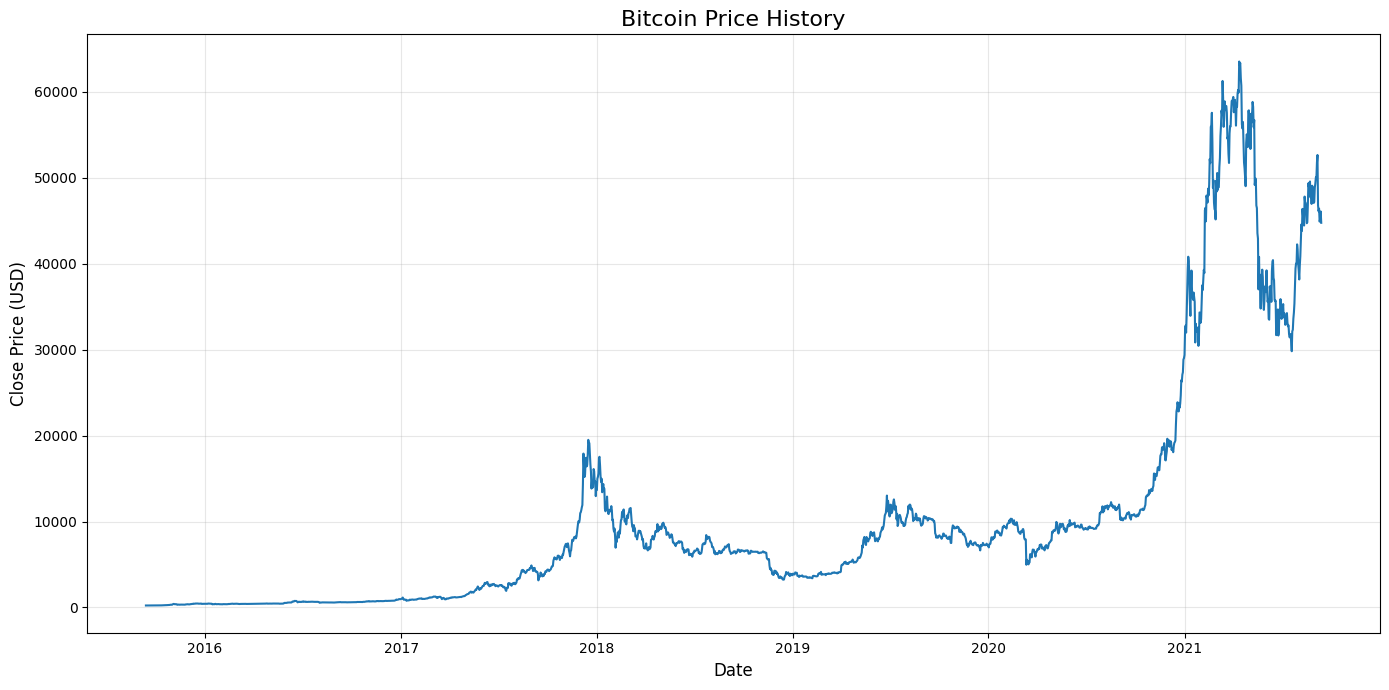

Testing Bitcoin price series for stationarity:
ADF Statistic: -0.3001
p-value: 0.9255
Critical Values:
	1%: -3.4334
	5%: -2.8629
	10%: -2.5675
Result: The series is non-stationary (fail to reject null hypothesis)

Running ARIMA Model
Finding optimal ARIMA parameters...
Best ARIMA order: (3, 1, 2) with AIC: 25117.52
ARIMA Model Evaluation:
MSE: 798132267.8389
RMSE: 28251.2348
MAE: 22519.4356
R²: -1.7410


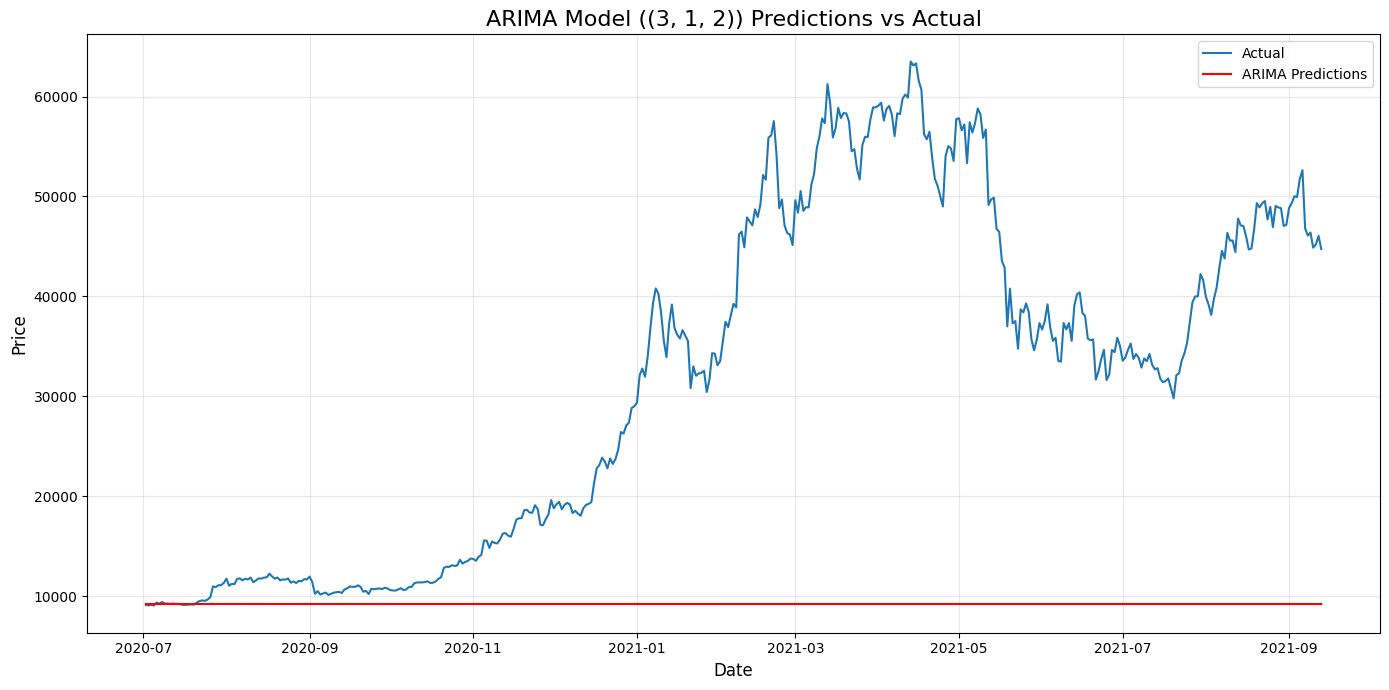

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu4uodyc7/zppe3oz1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu4uodyc7/zu_btvl2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80965', 'data', 'file=/tmp/tmpu4uodyc7/zppe3oz1.json', 'init=/tmp/tmpu4uodyc7/zu_btvl2.json', 'output', 'file=/tmp/tmpu4uodyc7/prophet_model4e0ourd0/prophet_model-20250428070854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Running Prophet Model
Fitting Prophet model...


07:08:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model Evaluation:
MSE: 877876611.2838
RMSE: 29628.9826
MAE: 23890.2280
R²: -2.0149


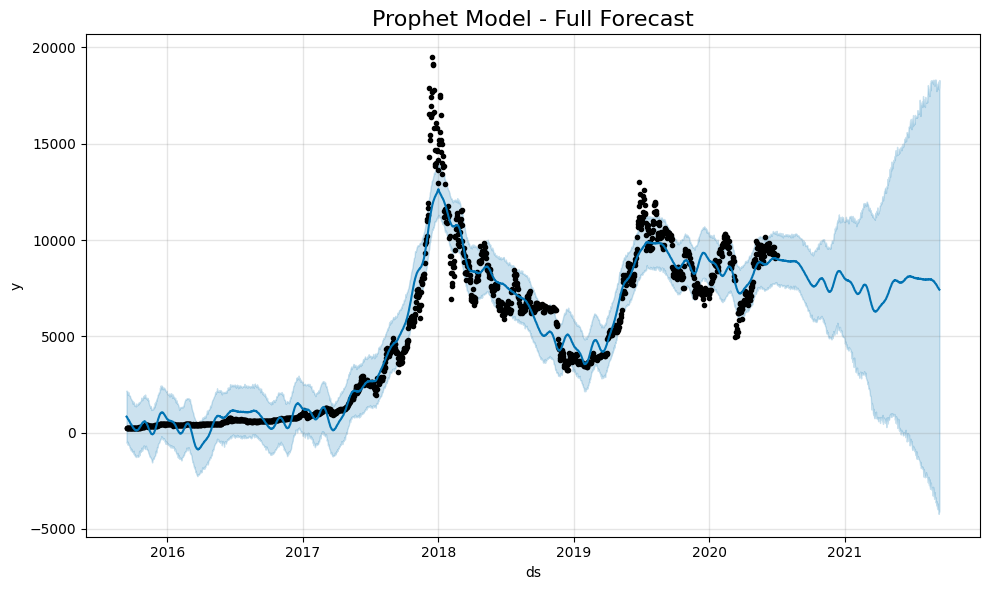

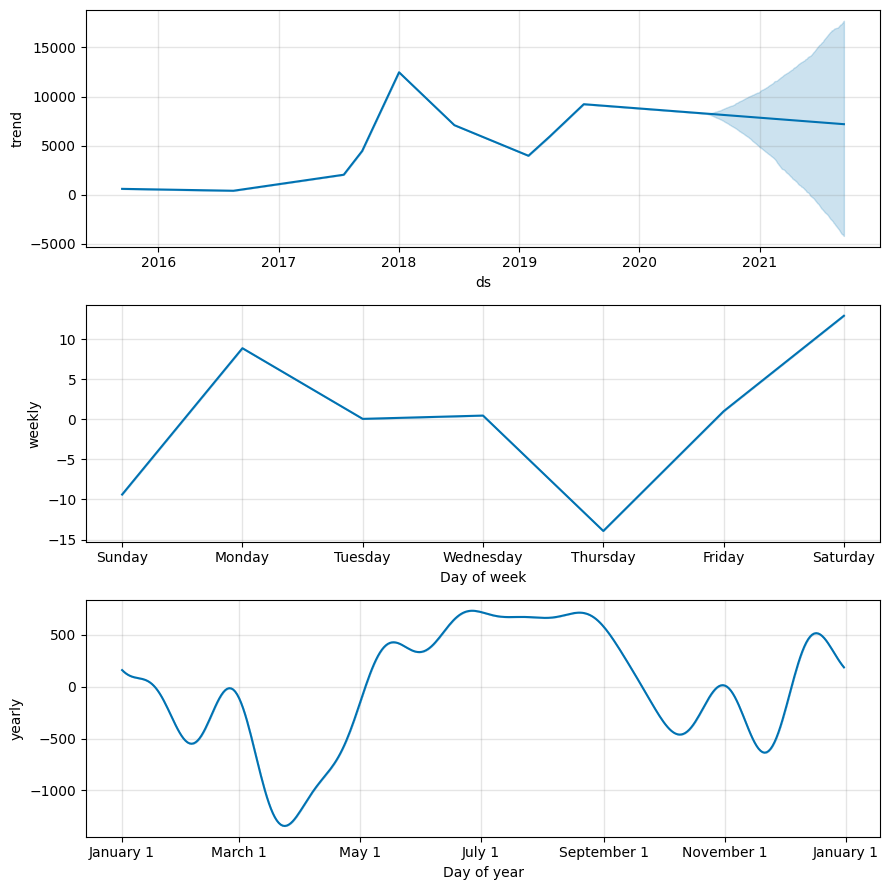


Running Hybrid ARIMA-XGBoost Model
Fitting ARIMA component of hybrid model...
Training XGBoost component on ARIMA residuals...
Hybrid ARIMA-XGBoost Model Evaluation:
MSE: 797958004.4730
RMSE: 28248.1505
MAE: 22515.5975
R²: -1.7404


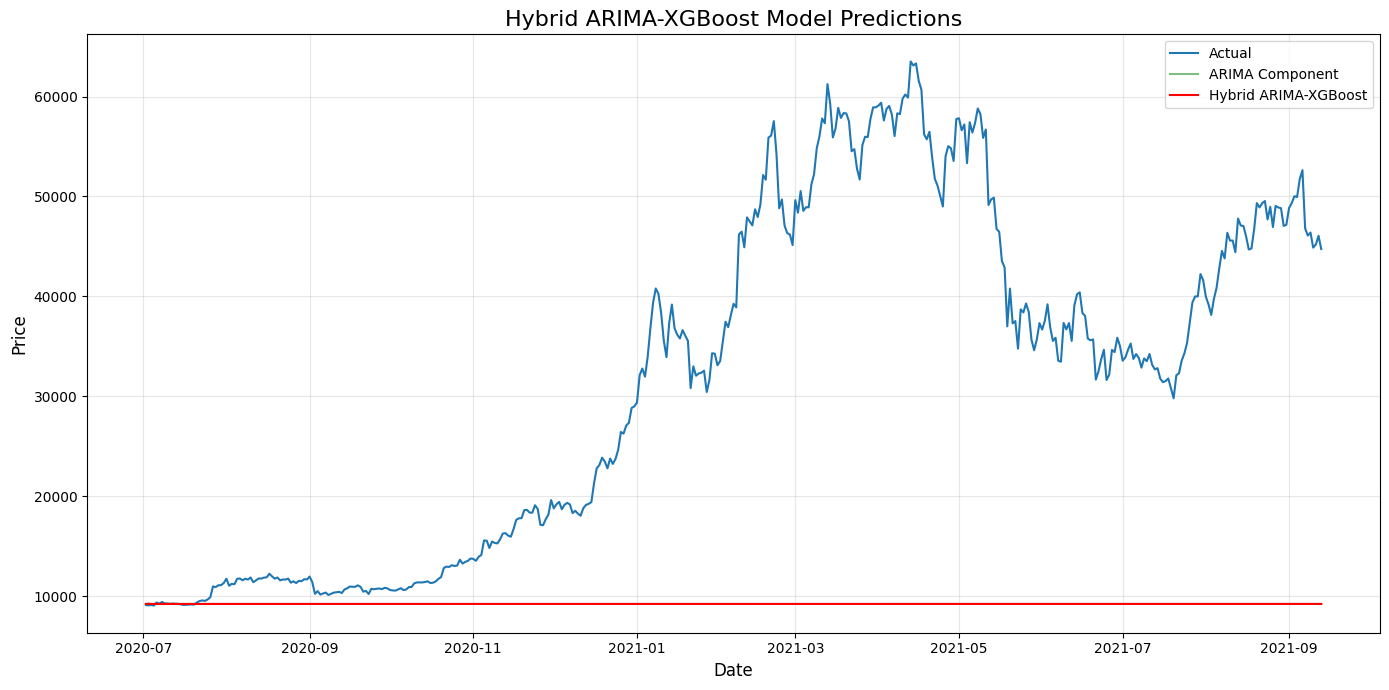


Running XGBoost Model
Training XGBoost model...
XGBoost Model Evaluation:
MSE: 513445365.7437
RMSE: 22659.3329
MAE: 17106.8021
R²: -0.7824


<Figure size 1200x800 with 0 Axes>

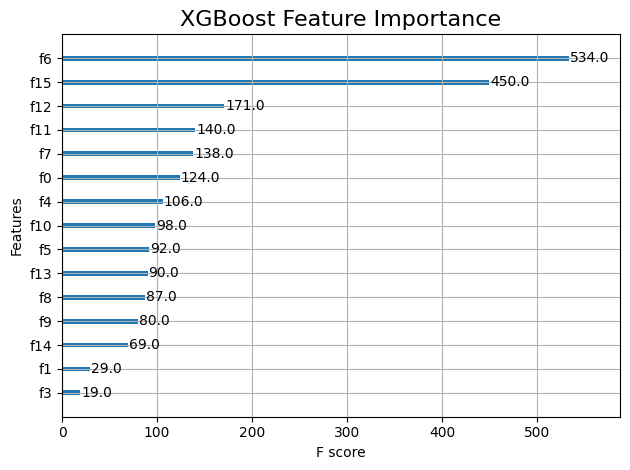

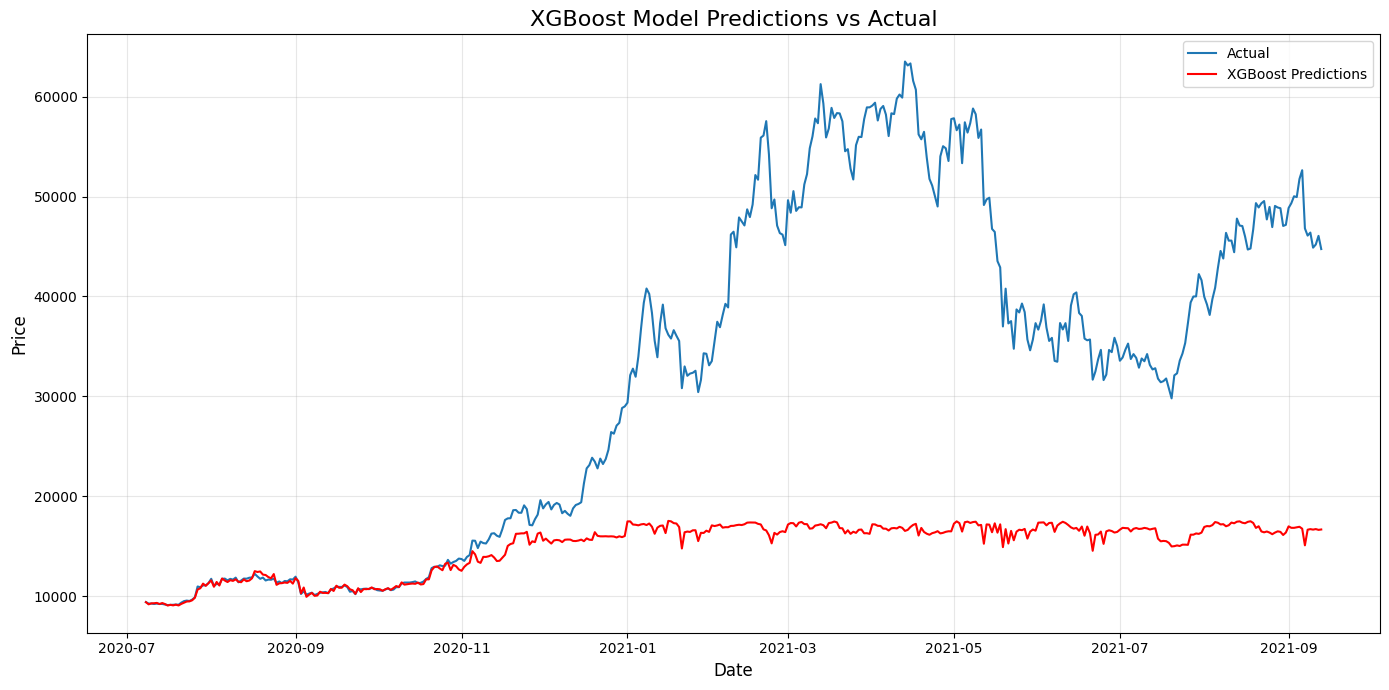


Model Comparison


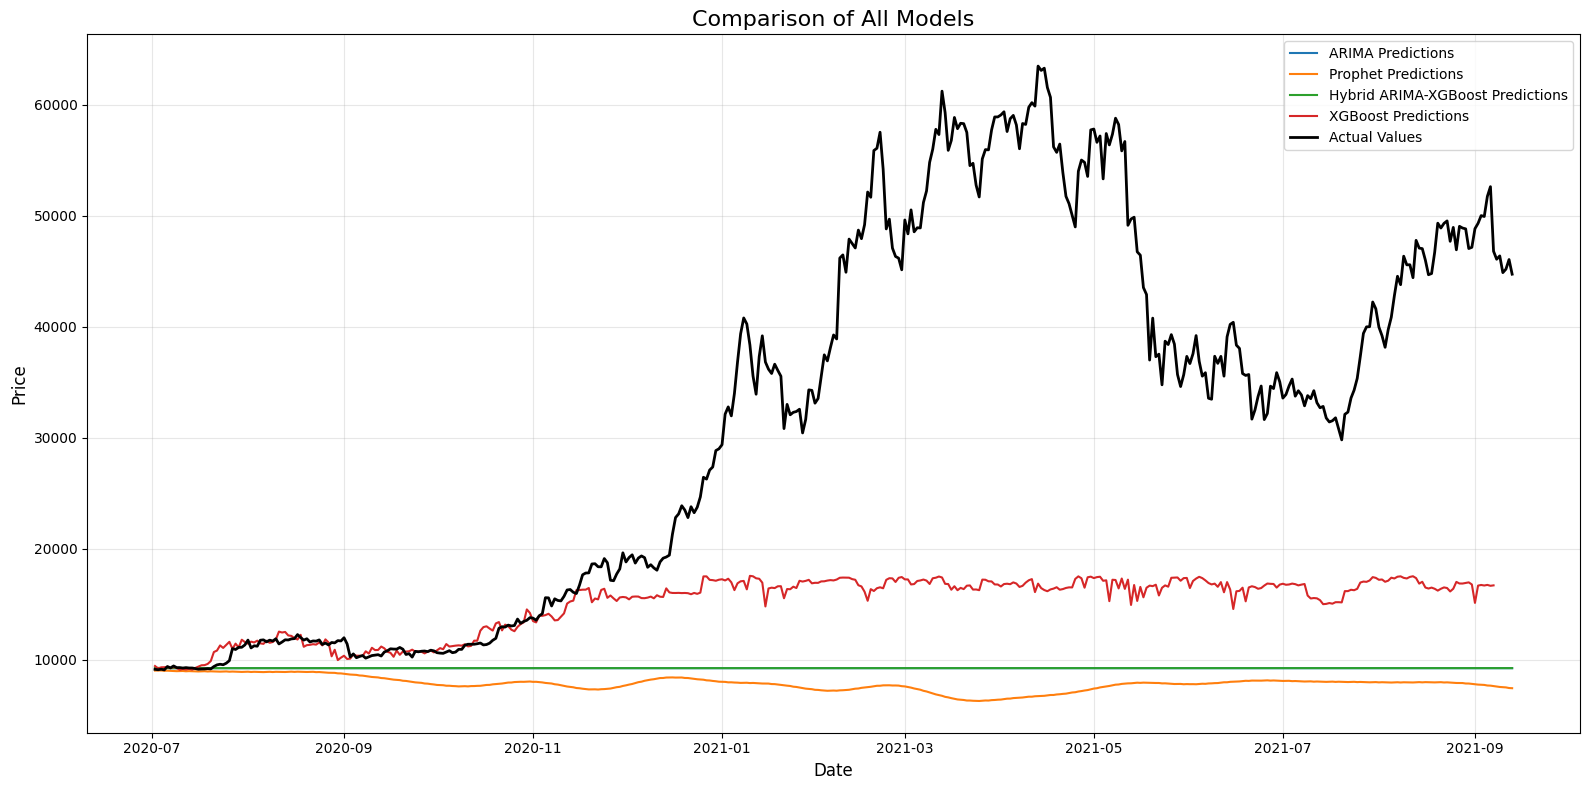

Model Performance Comparison:
                  Model           MSE          RMSE           MAE        R²
3               XGBoost  5.134454e+08  22659.332862  17106.802071 -0.782408
2  Hybrid ARIMA-XGBoost  7.979580e+08  28248.150461  22515.597464 -1.740404
0                 ARIMA  7.981323e+08  28251.234802  22519.435621 -1.741003
1               Prophet  8.778766e+08  29628.982623  23890.227976 -2.014866


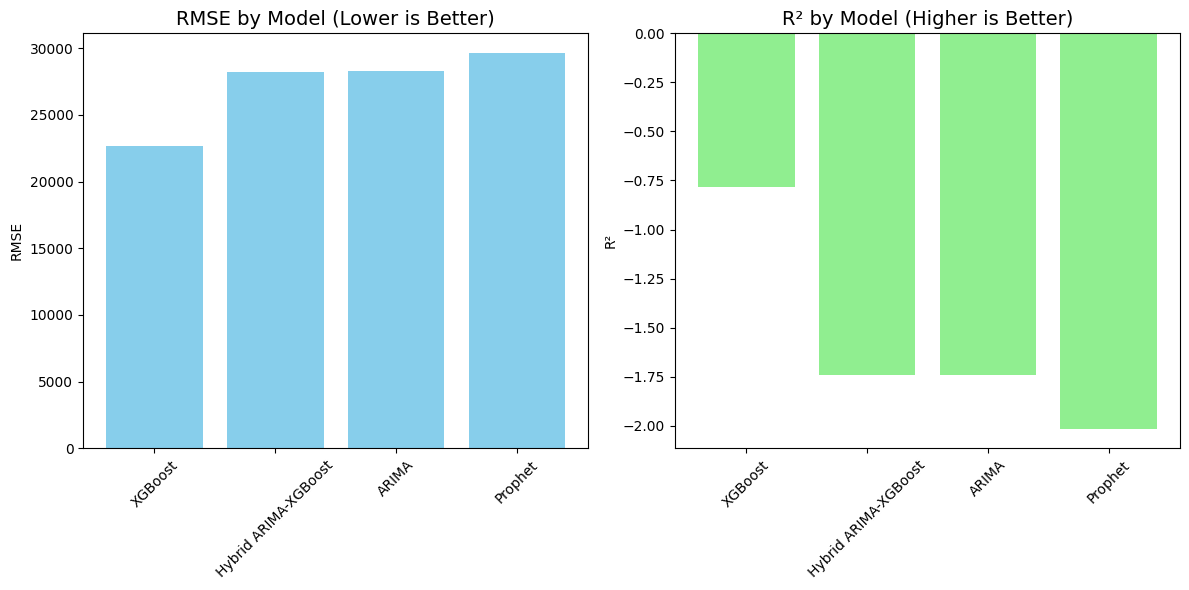


Best performing model: XGBoost with RMSE: 22659.3329

Future Predictions using XGBoost
Future prediction with XGBoost requires more complex feature engineering.
Implementation would require creating new features for future dates.


In [151]:
# Process the Bitcoin data
bitcoindf['date'] = pd.to_datetime(bitcoindf['date'])

# Visualize the price history
plt.figure(figsize=(14, 7))
plt.plot(bitcoindf['date'], bitcoindf['close'])
plt.title('Bitcoin Price History', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Check for stationarity (required for ARIMA)
def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    # Interpret result
    if result[1] <= 0.05:
        print("Result: The series is stationary (reject null hypothesis)")
    else:
        print("Result: The series is non-stationary (fail to reject null hypothesis)")

print("Testing Bitcoin price series for stationarity:")
check_stationarity(bitcoindf['close'])

# Run all models and store results
models_results = {}

print("\n" + "="*50)
print("Running ARIMA Model")
print("="*50)
arima_model, arima_order, arima_pred, arima_actual = implement_arima_model(bitcoindf)
models_results['ARIMA'] = (arima_model, arima_pred, arima_actual)

print("\n" + "="*50)
print("Running Prophet Model")
print("="*50)
prophet_model, prophet_forecast, prophet_pred, prophet_actual = implement_prophet_model(bitcoindf)
models_results['Prophet'] = (prophet_model, prophet_pred, prophet_actual)

print("\n" + "="*50)
print("Running Hybrid ARIMA-XGBoost Model")
print("="*50)
hybrid_models, hybrid_pred, hybrid_actual = implement_hybrid_arima_xgboost(bitcoindf)
models_results['Hybrid ARIMA-XGBoost'] = (hybrid_models, hybrid_pred, hybrid_actual)

print("\n" + "="*50)
print("Running XGBoost Model")
print("="*50)
xgb_model, xgb_pred, xgb_actual = implement_xgboost_model(bitcoindf)
models_results['XGBoost'] = (xgb_model, xgb_pred, xgb_actual)

# Compare all models
print("\n" + "="*50)
print("Model Comparison")
print("="*50)
comparison = compare_models(models_results)

# Identify best model
best_model_name = comparison.iloc[0]['Model']
best_model_rmse = comparison.iloc[0]['RMSE']
print(f"\nBest performing model: {best_model_name} with RMSE: {best_model_rmse:.4f}")

# Generate future predictions using best model
print("\n" + "="*50)
print(f"Future Predictions using {best_model_name}")
print("="*50)
best_model_info = models_results[best_model_name][0]
predict_future(best_model_info, best_model_name, days=30)
